# Project 1: SAT & ACT Analysis

## Problem Statement

Geographically, the United States remains divided by more than just geology. For each state, the participation rate of their high school students in the SAT vs ACT varies wildly. Yet, clear trends and correlations emerge. Why do some states remain loyal to only one test? Moreover, which specific factors influence the popularity of tests? Additionally, how do political and economic factors influence the layout of the test landscape? Finally, what can we suggest to raise participation rates.

## Executive Summary

The ACT dominates the SAT rate all three years in terms of participation. This results from State-Required Testing, Self-Selection, Economic Inequality, and Political Bias. To increase participation, we recommend that the SAT Board streamline the Fee Waiver Application Process, get rid of SAT Subject Tests, increase State-Required SAT Tests, add Science as its own Subject, and politically insist on the importance of SAT testing.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

#### This data has been provided by General Assembly July DSIR 2020. This code has been written by James Pecore but was also developed from insights and coaching with Kelly Slatery, Noah Christiansen, Aidan Curley, and Eric Heidbreder. Additional research links to sources outside of GA have been provided in the outside research section.

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

In [2]:
sat_2017 = pd.read_csv("../data/sat_2017.csv")

In [3]:
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

In [4]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [6]:
#Code:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [7]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

There are 51 states recorded for each spreadsheet. SAT Scores show the Partipation Rate (as a Percentage), ERW Score, Math Score, and Total Score for each state. ACT Scores show the Participation Rate (as a Percentage), English, Math, Reading, Science, and Composite Scores for each state.

While SAT Scores only allow for ERW and Math scores, ACT Scores allow for Science skills to be tested as well. 

#### 4a. Does the data look complete? 

The data looks complete overall, albeit there are a few errors that need to be corrected.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

SAT:
    min: 200 per category (400 composite)
    max: 800 per category (1600 composte)
ACT:
    min: 1 per category (averaged max same for composite)
    max: 36 per category (averaged max same for composite)

SAT Errors:
    Maryland shows a Math Score of 52 (which is impossible). Its score is 524. 

ACT Errors:
    Maryland shows a Science Score average of 2.3. Its real score is 22.3.
    Wyoming shows a Composite Score of 20.2x. Its real composite is 20.2

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [8]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [9]:
#code

sat_2017.at[21, 'Math'] = 524
act_2017.at[22, 'Science'] = 23.2
act_2017.at[51, 'Composite'] = float(20.6)

In [10]:
sat_2017.at[20, 'Math'] = 524
sat_2017[(sat_2017['Math']==524)]

#confirmed that it changed the pandas csv for Maryland et al.

,State,Participation,Evidence-Based Reading and Writing,Math,Total
4,California,53%,531,524,1055
20,Maryland,69%,536,524,1060
21,Massachusetts,76%,555,524,1107
39,Rhode Island,71%,539,524,1062


#### 5. What are your data types? 
Display the data types of each feature. 

In [11]:
#code
sat_2017.dtypes #(Objects are panda's name for strings)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [12]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Participation is listed as an object, i.e. a "String." 
- Participation strings should be floats.
- Composite should be floats.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
sat_2017['Participation'] = sat_2017['Participation'].map(lambda x: float(x[:-1]))

In [14]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [15]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [16]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.6


In [17]:
act_2017['Participation'] = act_2017['Participation'].map(lambda x: float(x[:-1]))

In [18]:
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [19]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29.0,23.5,23.3,24.6,23.5,23.8
48,Washington,29.0,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100.0,19.4,19.8,20.8,20.6,20.6


- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
#Yay! It changed properly.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
sat_2017.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.352941,1126.098039
std,35.276632,45.666901,47.339972,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,541.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


In [22]:
act_2017.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.011538,21.517308
std,31.832518,2.332132,1.963602,2.048672,3.123702,1.997716
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,22.525000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


- Display the data types again to confirm they are correct.

In [23]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [24]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
#code
sat_2017.columns = sat_2017.columns.str.lower()

In [26]:
sat_2017.columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')

In [27]:
sat_2017.rename(columns={'participation':'sat_17_participation'}, inplace = True)
sat_2017.rename(columns={'evidence-based reading and writing':'sat_17_erw'}, inplace = True)
sat_2017.rename(columns={'math':'sat_17_math'}, inplace = True)
sat_2017.rename(columns={'total':'sat_17_total'}, inplace = True)

In [28]:
sat_2017.columns

Index(['state', 'sat_17_participation', 'sat_17_erw', 'sat_17_math',
       'sat_17_total'],
      dtype='object')

In [29]:
act_2017.columns = act_2017.columns.str.lower()
act_2017.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [30]:
act_2017.rename(columns={'participation':'act_17_participation'}, inplace = True)
act_2017.rename(columns={'english':'act_17_english'}, inplace = True)
act_2017.rename(columns={'math':'act_17_math'}, inplace = True)
act_2017.rename(columns={'reading':'act_17_reading'}, inplace = True)
act_2017.rename(columns={'science':'act_17_science'}, inplace = True)
act_2017.rename(columns={'composite':'act_17_composite'}, inplace = True)

In [31]:
act_2017.columns

Index(['state', 'act_17_participation', 'act_17_english', 'act_17_math',
       'act_17_reading', 'act_17_science', 'act_17_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|state given| 
|participation|float|SAT|percentage of participants|
|erw|float|SAT|english-reading-writing score|
|math|float|SAT|math score|
|total|float|SAT|total score|
|state|object|ACT|state given|
|participation|float|ACT|percentage of participants|
|english|float|ACT|english score|
|math|float|ACT|math score|
|reading|float|ACT|reading score|
|science|float|ACT|science score|
|composite|float|ACT|composite score|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [32]:
#code

act_2017.drop([act_2017.index[0]], inplace=True) # do not run it more than once
#running more than once will continuously drop the 0th value

In [33]:
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [34]:
combined_2017 = pd.merge(sat_2017, act_2017, on='state')

In [35]:
combined_2017.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [36]:
combined_2017.to_csv('combined_2017')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [37]:
sat_2018 = pd.read_csv("../data/sat_2018.csv")

In [38]:
act_2018 = pd.read_csv("../data/act_2018.csv")

In [39]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [40]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [41]:
#no data errors to replace, only formatting issues

In [42]:
sat_2018.columns = sat_2018.columns.str.lower()

In [43]:
sat_2018.rename(columns={'participation':'sat_18_participation'}, inplace = True)
sat_2018.rename(columns={'evidence-based reading and writing':'sat_18_erw'}, inplace = True)
sat_2018.rename(columns={'math':'sat_18_math'}, inplace = True)
sat_2018.rename(columns={'total':'sat_18_total'}, inplace = True)

In [44]:
sat_2018['sat_18_participation'] = sat_2018['sat_18_participation'].map(lambda x: float(x[:-1]))

In [45]:
sat_2018.head()

,state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [46]:
act_2018.columns = act_2018.columns.str.lower()

In [47]:
act_2018.rename(columns={'participation':'act_18_participation'}, inplace = True)
act_2018.rename(columns={'english':'act_18_english'}, inplace = True)
act_2018.rename(columns={'math':'act_18_math'}, inplace = True)
act_2018.rename(columns={'english':'act_18_reading'}, inplace = True)
act_2018.rename(columns={'science':'act_18_science'}, inplace = True)
act_2018.rename(columns={'composite':'act_18_composite'}, inplace = True)

In [48]:
act_2018.at[8, '2018_state'] = 'District of Columbia'

In [49]:
act_2018['act_18_participation'] = act_2018['act_18_participation'].map(lambda x: float(x[:-1]))

In [50]:
act_2018.head()

,state,act_18_participation,act_18_composite,2018_state
0,Alabama,100.0,19.1,NaN
1,Alaska,33.0,20.8,NaN
2,Arizona,66.0,19.2,NaN
3,Arkansas,100.0,19.4,NaN
4,California,27.0,22.7,NaN


In [51]:
combined_2018 = pd.merge(sat_2018, act_2018, on='state')

In [52]:
combined_2018.head()

,state,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_composite,2018_state
0,Alabama,6.0,595,571,1166,100.0,19.1,NaN
1,Alaska,43.0,562,544,1106,33.0,20.8,NaN
2,Arizona,29.0,577,572,1149,66.0,19.2,NaN
3,Arkansas,5.0,592,576,1169,100.0,19.4,NaN
4,California,60.0,540,536,1076,27.0,22.7,NaN


In [53]:
combined_2018.to_csv('combined_2018')

In [54]:
# 2019 Info

In [55]:
sat_2019 = pd.read_csv("../data/sat_2019.csv", encoding='latin1')

In [56]:
#sat_2019 used to check out the unnecessary states

In [57]:
sat_2019.drop([sat_2019.index[39]], inplace=True)

In [58]:
sat_2019.drop([sat_2019.index[46]], inplace=True)

In [59]:
#sat_2019 used to check out the states to confirm the successful drop

In [60]:
sat_2019.tail()

,State,Participation Rate,EBRW,Math,Total
48,Virginia,68%,567,551,1119
49,Washington,70%,539,535,1074
50,West Virginia,99%,483,460,943
51,Wisconsin,3%,635,648,1283
52,Wyoming,3%,623,615,1238


In [61]:
sat_2019.columns = sat_2019.columns.str.lower()

In [62]:
sat_2019.columns

Index(['state', 'participation rate', 'ebrw', 'math', 'total'], dtype='object')

In [63]:
sat_2019.rename(columns={'participation rate':'sat_19_participation'}, inplace = True)
sat_2019.rename(columns={'ebrw':'sat_19_erw'}, inplace = True)
sat_2019.rename(columns={'math':'sat_19_math'}, inplace = True)
sat_2019.rename(columns={'total':'sat_19_total'}, inplace = True)

In [64]:
sat_2019.head()

,state,sat_19_participation,sat_19_erw,sat_19_math,sat_19_total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [65]:
sat_2019['sat_19_participation'] = sat_2019['sat_19_participation'].map(lambda x: float(x[:-1]))

In [66]:
act_2019 = pd.read_csv("../data/act_2019.csv")

In [67]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [68]:
act_2019.columns = act_2019.columns.str.lower()

In [69]:
act_2019.rename(columns={'participation':'act_19_participation'}, inplace = True)
act_2019.rename(columns={'composite':'act_19_composite'}, inplace = True)

In [70]:
act_2019['act_19_participation'] = act_2019['act_19_participation'].map(lambda x: float(x[:-1]))

In [71]:
act_2019.tail()

,state,act_19_participation,act_19_composite
47,Washington,24.0,22.1
48,West Virginia,49.0,20.8
49,Wisconsin,100.0,20.3
50,Wyoming,100.0,19.8
51,National,52.0,20.7


In [72]:
combined_2019 = pd.merge(sat_2019, act_2019, on='state')

In [73]:
combined_2019.head()

,state,sat_19_participation,sat_19_erw,sat_19_math,sat_19_total,act_19_participation,act_19_composite
0,Alabama,7.0,583,560,1143,100.0,18.9
1,Alaska,41.0,556,541,1097,38.0,20.1
2,Arizona,31.0,569,565,1134,73.0,19.0
3,Arkansas,6.0,582,559,1141,100.0,19.3
4,California,63.0,534,531,1065,23.0,22.6


In [74]:
combined_2019.to_csv('combined_2019')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [75]:
combined_2017_2018 = pd.merge(combined_2017, combined_2018, on='state')

In [76]:
combined_2017_2018.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,sat_18_participation,sat_18_erw,sat_18_math,sat_18_total,act_18_participation,act_18_composite,2018_state
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1,NaN
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8,NaN
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2,NaN
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4,NaN
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7,NaN


In [77]:
combined_17_18_19 = pd.merge(combined_2017_2018, combined_2019, on='state')

In [78]:
combined_17_18_19.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,...,sat_18_total,act_18_participation,act_18_composite,2018_state,sat_19_participation,sat_19_erw,sat_19_math,sat_19_total,act_19_participation,act_19_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,1166,100.0,19.1,NaN,7.0,583,560,1143,100.0,18.9
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,1106,33.0,20.8,NaN,41.0,556,541,1097,38.0,20.1
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,1149,66.0,19.2,NaN,31.0,569,565,1134,73.0,19.0
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,1169,100.0,19.4,NaN,6.0,582,559,1141,100.0,19.3
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,1076,27.0,22.7,NaN,63.0,534,531,1065,23.0,22.6


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [79]:
combined_17_18_19.describe()

,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,...,sat_18_math,sat_18_total,act_18_participation,act_18_composite,sat_19_participation,sat_19_erw,sat_19_math,sat_19_total,act_19_participation,act_19_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.705882,569.725490,556.960784,1127.313725,64.784314,20.927451,21.192157,22.011765,21.015686,21.529412,...,556.647059,1120.725490,61.235294,21.503922,49.156863,561.137255,552.627451,1113.823529,58.156863,21.480392
std,35.112559,44.679784,46.371957,90.520382,32.806288,2.347942,1.994878,2.064524,3.158061,2.018940,...,47.189331,93.191433,34.648283,2.120279,38.869717,45.823583,50.760993,96.259380,35.104628,2.212150
min,2.000000,503.000000,492.000000,996.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,...,486.000000,998.000000,7.000000,17.700000,2.000000,483.000000,460.000000,943.000000,6.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,...,522.500000,1057.500000,27.000000,19.950000,5.500000,527.500000,511.500000,1038.000000,23.500000,19.800000
50%,38.000000,559.000000,541.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,...,544.000000,1098.000000,66.000000,21.300000,54.000000,550.000000,546.000000,1097.000000,54.000000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,...,593.500000,1204.000000,100.000000,23.750000,82.000000,612.000000,599.000000,1210.000000,100.000000,23.900000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,...,655.000000,1298.000000,100.000000,25.600000,100.000000,636.000000,648.000000,1284.000000,100.000000,25.500000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [80]:
#Code adapted with help from GeeksforGeeks https://stackoverflow.com/questions/24023927/computing-standard-deviation-without-packages-in-python
#Adapted to be used without needing to import the math library (so no sqrt function, no mean function, etc.)
#Primarily gave the idea for using pow to basically help construct the iteration sequence for the subtraction part of the function

def stan_dev(ls):
    sum_ = 0
    mn = sum(ls)/len(ls)
    for i in ls:
        sum_ += pow((i-mn),2)
    return ((sum_/len(ls)))**(1/2)

stan_dev([1,2,3,5])

1.479019945774904

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [81]:
dict_stan_dev = {i:stan_dev(combined_17_18_19[i],) for i in combined_17_18_19.columns[1:]}
dict_stan_dev

{'sat_17_participation': 34.76661353048807,
 'sat_17_erw': 44.23957878011567,
 'sat_17_math': 45.91507966410733,
 'sat_17_total': 89.62853410235164,
 'act_17_participation': 32.48306570911004,
 'act_17_english': 2.324808946936057,
 'act_17_math': 1.9752233070336587,
 'act_17_reading': 2.0441832405895677,
 'act_17_science': 3.1269462989437913,
 'act_17_composite': 1.9990482164335854,
 'sat_18_participation': 37.13074253933647,
 'sat_18_erw': 46.66211050422986,
 'sat_18_math': 46.724399944493776,
 'sat_18_total': 92.273268159942,
 'act_18_participation': 34.30691248890431,
 'act_18_composite': 2.099389340187203,
 '2018_state': nan,
 'sat_19_participation': 38.48675481305206,
 'sat_19_erw': 45.372108391779825,
 'sat_19_math': 50.26087270307837,
 'sat_19_total': 95.31098858162156,
 'act_19_participation': 34.758761089983814,
 'act_19_composite': 2.1903549365739288}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [82]:
combined_17_18_19.describe()

,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite,...,sat_18_math,sat_18_total,act_18_participation,act_18_composite,sat_19_participation,sat_19_erw,sat_19_math,sat_19_total,act_19_participation,act_19_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.705882,569.725490,556.960784,1127.313725,64.784314,20.927451,21.192157,22.011765,21.015686,21.529412,...,556.647059,1120.725490,61.235294,21.503922,49.156863,561.137255,552.627451,1113.823529,58.156863,21.480392
std,35.112559,44.679784,46.371957,90.520382,32.806288,2.347942,1.994878,2.064524,3.158061,2.018940,...,47.189331,93.191433,34.648283,2.120279,38.869717,45.823583,50.760993,96.259380,35.104628,2.212150
min,2.000000,503.000000,492.000000,996.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,...,486.000000,998.000000,7.000000,17.700000,2.000000,483.000000,460.000000,943.000000,6.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,...,522.500000,1057.500000,27.000000,19.950000,5.500000,527.500000,511.500000,1038.000000,23.500000,19.800000
50%,38.000000,559.000000,541.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,...,544.000000,1098.000000,66.000000,21.300000,54.000000,550.000000,546.000000,1097.000000,54.000000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,...,593.500000,1204.000000,100.000000,23.750000,82.000000,612.000000,599.000000,1210.000000,100.000000,23.900000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,...,655.000000,1298.000000,100.000000,25.600000,100.000000,636.000000,648.000000,1284.000000,100.000000,25.500000


In [83]:
combined_17_18_19.std()

sat_17_participation    35.112559
sat_17_erw              44.679784
sat_17_math             46.371957
sat_17_total            90.520382
act_17_participation    32.806288
act_17_english           2.347942
act_17_math              1.994878
act_17_reading           2.064524
act_17_science           3.158061
act_17_composite         2.018940
sat_18_participation    37.500212
sat_18_erw              47.126422
sat_18_math             47.189331
sat_18_total            93.191433
act_18_participation    34.648283
act_18_composite         2.120279
2018_state                    NaN
sat_19_participation    38.869717
sat_19_erw              45.823583
sat_19_math             50.760993
sat_19_total            96.259380
act_19_participation    35.104628
act_19_composite         2.212150
dtype: float64

In [84]:
#My function for standard deviation appears to be off from the original function very slightly, as values are no more than 1 off.

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [85]:
combined_17_18_19.sort_values('sat_17_participation')[['state','sat_17_participation']].head()
#These values represent the lowest participation rates for the 2017 SAT.

,state,sat_17_participation
34,North Dakota,2.0
24,Mississippi,2.0
14,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


In [86]:
combined_17_18_19.sort_values('act_17_participation')[['state','act_17_participation']].head()
#These values represent the lowest participation rates for the 2017 act.

,state,act_17_participation
18,Maine,8.0
19,Maine,8.0
7,Delaware,18.0
29,New Hampshire,18.0
39,Rhode Island,21.0


In [87]:
combined_17_18_19.sort_values('sat_17_participation',ascending=False)[['state','sat_17_participation']].head()

,state,sat_17_participation
7,Delaware,100.0
22,Michigan,100.0
6,Connecticut,100.0
29,New Hampshire,96.0
19,Maine,95.0


In [88]:
sat_17_part_high = combined_17_18_19.sort_values('sat_17_participation',ascending=False)[['state','sat_17_participation']]
act_17_part_high = combined_17_18_19.sort_values('sat_17_participation',ascending=False)[['state','sat_17_participation']]
#These above values represent the highest participation rates for the 2017 SAT.
#These above values represent the highest participation rates for the 2017 SAT.

In [89]:
combined_17_18_19.sort_values('act_17_participation',ascending=True)[['state','act_17_participation']].head()
#These values represent the highest participation rates for the 2017 act.

,state,act_17_participation
18,Maine,8.0
19,Maine,8.0
7,Delaware,18.0
29,New Hampshire,18.0
39,Rhode Island,21.0


In [90]:
combined_17_18_19.sort_values('act_17_participation',ascending=False)[['state','act_17_participation']].head()
#These values represent the highest participation rates for the 2017 act.

,state,act_17_participation
0,Alabama,100.0
16,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


In [91]:
combined_17_18_19.sort_values('sat_18_participation')[['state','sat_18_participation']].head()
#These values represent the lowest participation rates for the 2018 SAT.

,state,sat_18_participation
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


In [92]:
combined_17_18_19.sort_values('sat_18_participation', ascending=False)[['state','sat_18_participation']].head(10)
#These values represent the highest participation rates for the 2018 SAT.

,state,sat_18_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
11,Idaho,100.0
19,Maine,99.0
18,Maine,99.0
12,Illinois,99.0
39,Rhode Island,97.0
29,New Hampshire,96.0


In [93]:
combined_17_18_19.sort_values('act_18_participation')[['state','act_18_participation']].head()
#These values represent the lowest participation rates for the 2018 act.

,state,act_18_participation
18,Maine,7.0
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0


In [94]:
combined_17_18_19.sort_values('act_18_participation',ascending=False)[['state','act_18_participation']].head()
#These values represent the highest participation rates for the 2018 act.

,state,act_18_participation
0,Alabama,100.0
16,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


In [95]:
combined_17_18_19.sort_values('sat_19_participation')[['state','sat_19_participation']].head()
#These values represent the lowest participation rates for the 2019 SAT.

,state,sat_19_participation
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


In [96]:
combined_17_18_19.sort_values('sat_19_participation',ascending=False)[['state','sat_19_participation']].head(10)
#These values represent the highest participation rates for the 2019 SAT.

,state,sat_19_participation
39,Rhode Island,100.0
22,Michigan,100.0
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
8,Florida,100.0
11,Idaho,100.0
12,Illinois,100.0
48,West Virginia,99.0
19,Maine,99.0


In [97]:
combined_17_18_19.sort_values('act_19_participation',ascending=True)[['state','act_19_participation']].head()
#These values represent the lowest participation rates for the 2019 act.

,state,act_19_participation
18,Maine,6.0
19,Maine,6.0
39,Rhode Island,12.0
7,Delaware,13.0
29,New Hampshire,14.0


In [98]:
combined_17_18_19.sort_values('act_19_participation',ascending=False)[['state','act_19_participation']].head()
#These values represent the highest participation rates for the 2019 act.

,state,act_19_participation
0,Alabama,100.0
16,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


In [99]:
    #Yes! Many SAT and ACT participation rates reach 100% and change, but only change slightly.
    #Many stay same, like Maine retained it's 99.0 SAT Participation rate from 2018-2019. Most republican, ACT stronghold states remain the same.
    #Some change, but only slightly, like Rhode Island's SAT rate rose from 99% to 100% from 2018-2019.
    #The major change was in 2017, when many rose up to fully 100%

In [100]:
    #Yes. Many states have over 50% in both tests for the same year.
    #South Carolina in 2017, for instance, has over 50% participation for both ACT and SAT. This indicates that many people there take both tests.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [101]:
import seaborn as sns

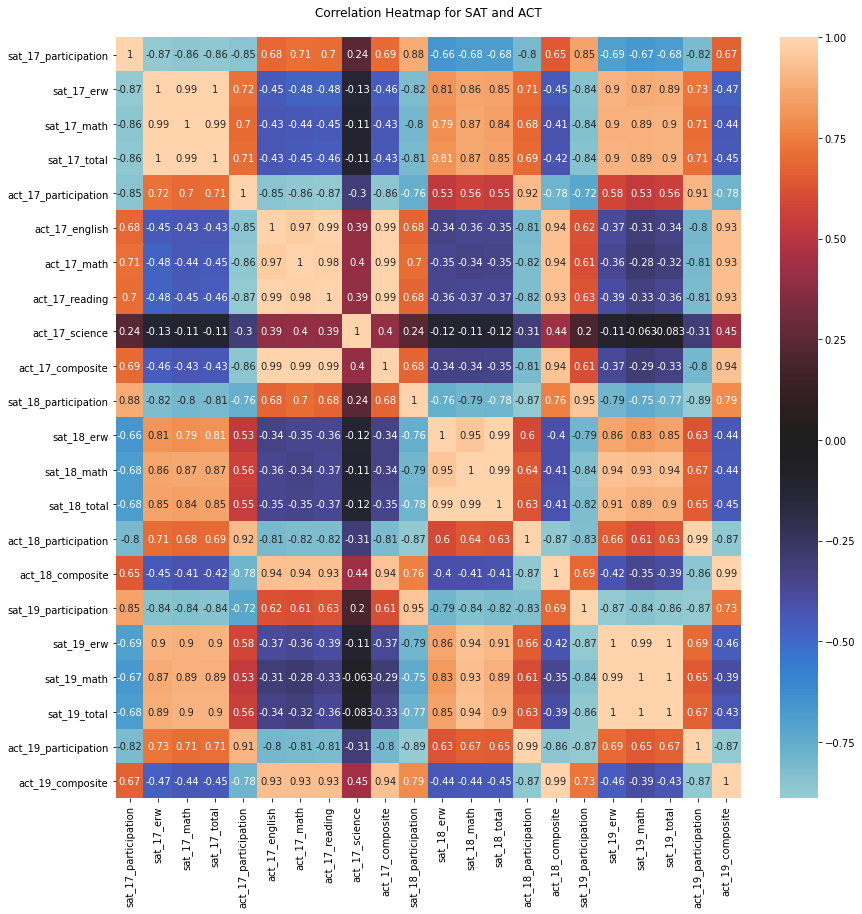

In [102]:
fig = plt.figure(figsize=(14,14))
ax = sns.heatmap(combined_17_18_19.corr(),annot=True, center=0)
ax.set_title('Correlation Heatmap for SAT and ACT\n');

#Code developed with help on formatting from this source: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [103]:
#Mean scores are negatively correlated with participation rate. 
#This makes sense due to Selection Bias; people will pick the test they tend to perform higher on.

In [104]:
#combined_17_18_19.corr() another, less colorful way to view the heatmap.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [105]:
#Defines a function to plot histograms showing comparative distributions of variables in a dataframe
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, figsize_tuple, bins_range = None):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=figsize_tuple,nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
            ax[i].hist(dataframe[column],bins=bins_range) # feel free to add more settings
            ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
            ax[i].set_xlabel(list_of_xlabels[i])
            ax[i].set_ylabel(list_of_ylabels[i])
            plt.tight_layout()
            
            #Above code provided by General Assembly

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

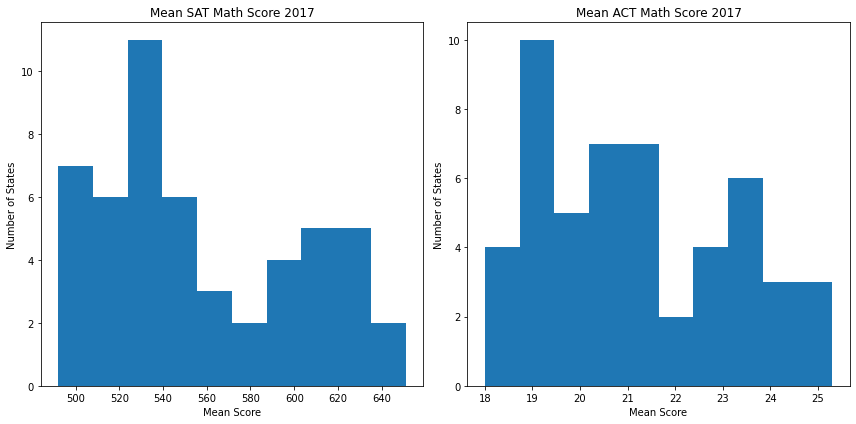

In [106]:
#Math Scores
subplot_histograms(
    combined_17_18_19,
    ['sat_17_math','act_17_math'],
    ['Mean SAT Math Score 2017','Mean ACT Math Score 2017'],
    ['Mean Score','Mean Score'],
    ['Number of States','Number of States'],
    (12,6))

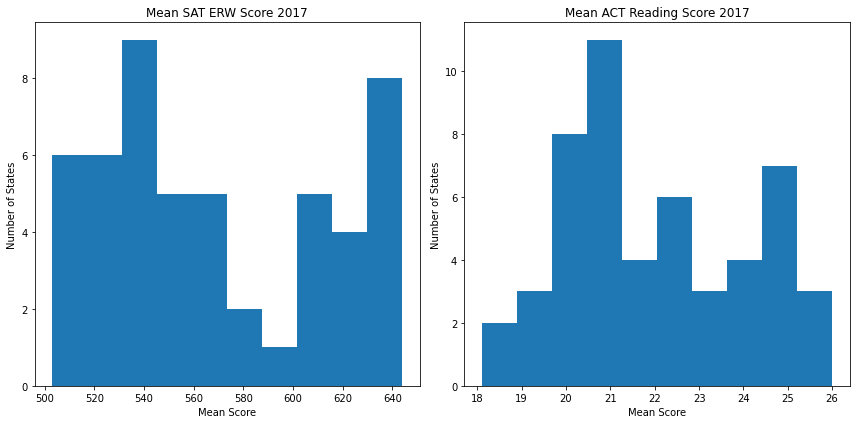

In [107]:
#ERW/Reading Scores
subplot_histograms(
    combined_17_18_19,
    ['sat_17_erw','act_17_reading'],
    ['Mean SAT ERW Score 2017','Mean ACT Reading Score 2017'],
    ['Mean Score','Mean Score'],
    ['Number of States','Number of States'],
    (12,6))

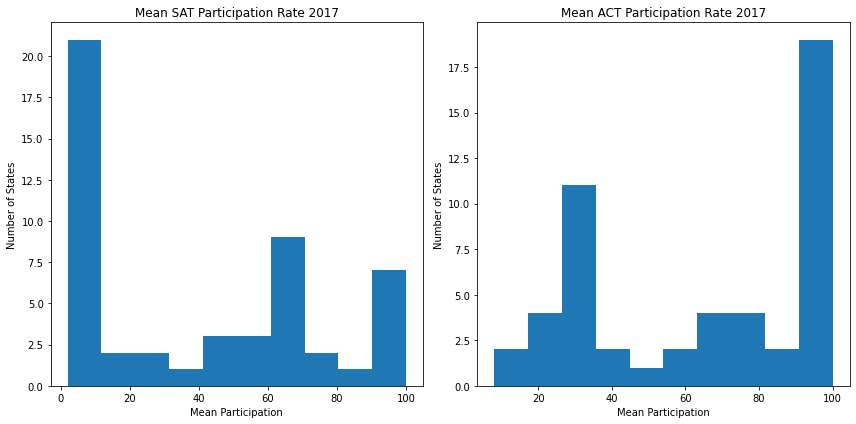

In [108]:
#Participation Scores
subplot_histograms(
    combined_17_18_19,
    ['sat_17_participation','act_17_participation'],
    ['Mean SAT Participation Rate 2017','Mean ACT Participation Rate 2017'],
    ['Mean Participation','Mean Participation'],
    ['Number of States','Number of States'],
    (12,6))

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


#### SAT vs. ACT Math Scores for 2017

In [109]:
def subplot_scatterplot(column1,column2,xlabel,ylabel,title):
    f = plt.figure(figsize=(8,5))
    sns.set_style('whitegrid')
    sns.scatterplot(x=combined_17_18_19[column1],y=combined_17_18_19[column2])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,size=24);
    
#Seaborn Scatterplots developed with help of this model code https://seaborn.pydata.org/examples/scatter_bubbles.html

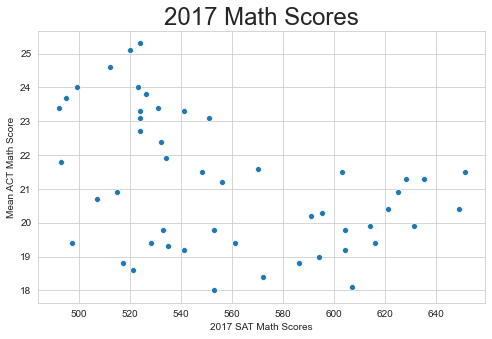

In [110]:
subplot_scatterplot('sat_17_math','act_17_math','2017 SAT Math Scores',
                    'Mean ACT Math Score','2017 Math Scores')

#### SAT ERW vs. ACT Reading Scores for 2017

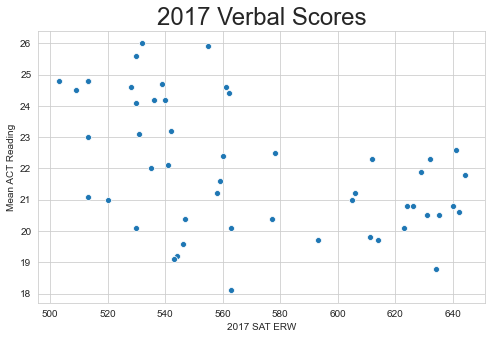

In [111]:
subplot_scatterplot('sat_17_erw','act_17_reading','2017 SAT ERW',
                    'Mean ACT Reading','2017 Verbal Scores')

#### SAT vs. ACT Total/Composite Scores for 2018

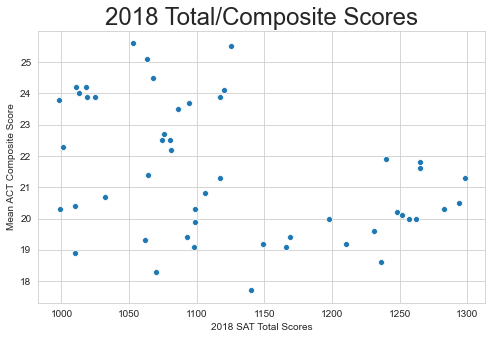

In [112]:
subplot_scatterplot('sat_18_total','act_18_composite','2018 SAT Total Scores',
                    'Mean ACT Composite Score','2018 Total/Composite Scores')

#### SAT vs. ACT Total/Composite Scores for 2019

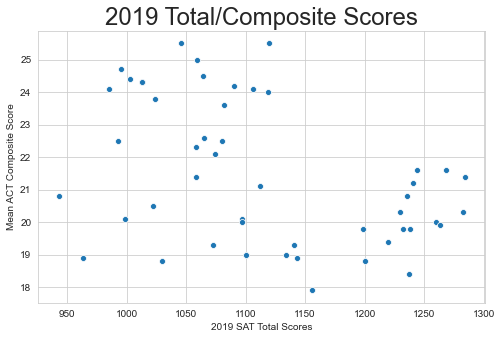

In [113]:
subplot_scatterplot('sat_19_total','act_19_composite','2019 SAT Total Scores',
                    'Mean ACT Composite Score','2019 Total/Composite Scores')

In [114]:
#Interpretation: These scatter plots all confirm the idea of self-selection bias. If one gets a higher score on the ACT, one is more likely to take it instead of the SAT. Vice versa also applies.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [115]:
# Code

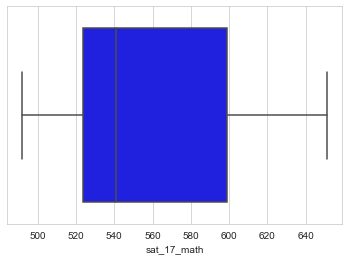

In [116]:
sns.boxplot(combined_17_18_19['sat_17_math'], color='b');

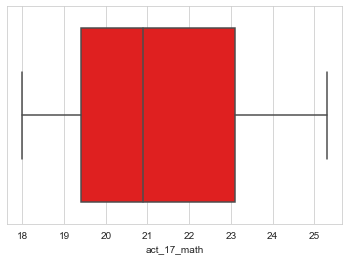

In [117]:
sns.boxplot(combined_17_18_19['act_17_math'], color='r');

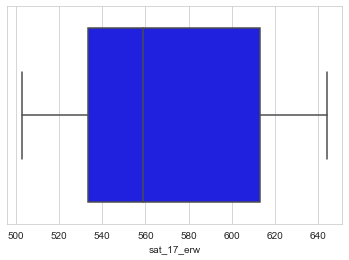

In [118]:
sns.boxplot(combined_17_18_19['sat_17_erw'], color='b');

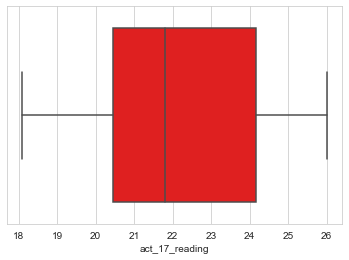

In [119]:
sns.boxplot(combined_17_18_19['act_17_reading'], color='r');

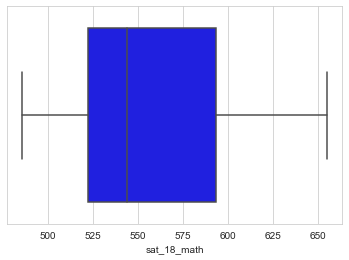

In [120]:
sns.boxplot(combined_17_18_19['sat_18_math'], color='b');

In [121]:
#value unavailable sns.boxplot(combined_17_18_19['act_18_math'], color='r');

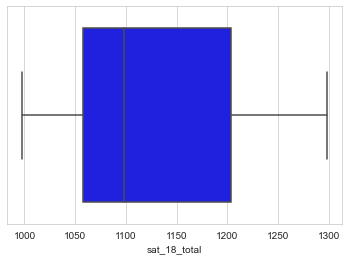

In [122]:
sns.boxplot(combined_17_18_19['sat_18_total'], color='b');

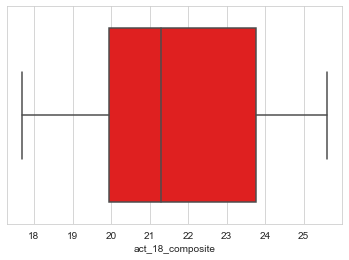

In [123]:
sns.boxplot(combined_17_18_19['act_18_composite'], color='r');

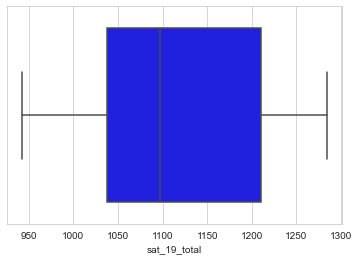

In [124]:
sns.boxplot(combined_17_18_19['sat_19_total'], color='b');

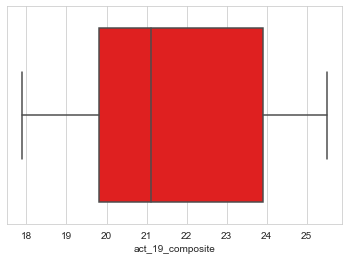

In [125]:
sns.boxplot(combined_17_18_19['act_19_composite'], color='r');

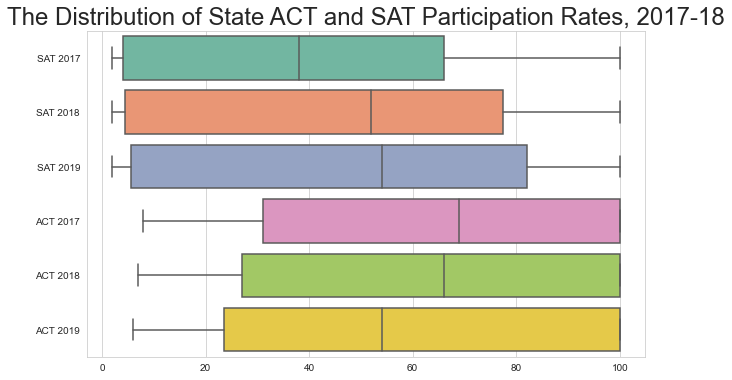

In [126]:
#Boxplot for ACT and SAT participation rates, 2017 and 2018 (4 vars)
participation_rates = combined_17_18_19.loc[:,['sat_17_participation','sat_18_participation','sat_19_participation', 'act_17_participation','act_18_participation', 'act_19_participation']]
participation_rates = participation_rates.rename(columns={
    'sat_17_participation':'SAT 2017',
    'sat_18_participation':'SAT 2018',
    'sat_19_participation':'SAT 2019',
    'act_17_participation':'ACT 2017',
    'act_18_participation':'ACT 2018',
    'act_19_participation':'ACT 2019',
})

plt.figure(figsize=(10,6))
plt.title('The Distribution of State ACT and SAT Participation Rates, 2017-18', size=24)
sns.boxplot(data=participation_rates,orient='h',palette='Set2');

#Link provided to model used to help create combined boxplot https://seaborn.pydata.org/examples/grouped_boxplot.html

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

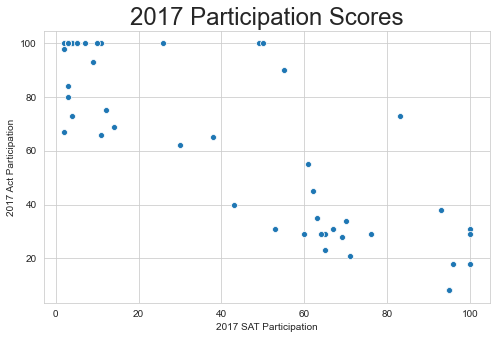

In [127]:
subplot_scatterplot('sat_17_participation','act_17_participation','2017 SAT Participation',
                    '2017 Act Participation','2017 Participation Scores')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [128]:
#No. <3

## Outside Research

https://www.brookings.edu/research/race-gaps-in-sat-scores-highlight-inequality-and-hinder-upward-mobility/ 
impact of race, wealth, required testing

https://www.vox.com/the-goods/2019/3/28/18282453/sat-act-college-admission-testing-cost-price 
impact of wealth

https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html 
impact of wealth

https://www.forbes.com/sites/prestoncooper2/2020/02/07/should-colleges-abandon-sat-score-requirements/#277e3736edd3 
Abandoning score requirements

https://www.insidehighered.com/admissions/article/2018/06/25/younger-people-and-democrats-more-likely-back-test-optional-admissions 
Abandoning score requirements w politics

https://www.census.gov/library/visualizations/2016/comm/cb16-158_median_hh_income_map.html #US MEDIAN INCOME BY STATE

https://www.270towin.com/maps/2016-actual-electoral-map Democrat vs Republican 2016 Race.

https://www.statista.com/statistics/233301/median-household-income-in-the-united-states-by-education/
Income from college

https://www.testive.com/state-sat-act/#:~:text=Each%20U.S.%20state%20has%20a,student%20achievement%20using%20standardized%20tests.&text=In%20addition%2C%20free%20 State-required testing by state

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

#Main Talking Points

0. Self-selection bias between state score mean and participation rate. High correlation.

1. The ACT has more people participating than the SAT on average. 

2. The ACT's participation is also rising more steadily. Why are these true?

3. The ACT costed less than the SAT to take from 2017-2019 (it costed around $45, while the SAT costed $52+ PLUS fees for Subject Tests)

4. Wealthier families can afford to pay for their students to pay for multiple tests. 

5. Median states with lower income are also the most popular states for the ACT. Median states with higher income are also the most popular states for the SAT.

6. Republican, rural/mountainous states are more likely to endorse the ACT. Coastal, liberal states are more likely to endorse the SAT.

7. Ways to increase SAT Participation:

    7a. Streamline the process to claim a waive fee. 
    
    7b. Add "Science" as a subject so that kids can excel at that specific subject like they can on the ACT.

    7c. Get rid of the SAT added fees for Subject Tests.
    
    7d. Political reformation by democrats insisting on the necessity of Test Scores.
    
8. Ways to increase economic equity through the SAT/ACT.

    8a. Streamline the process to claim a waive fee. 
    
    8b. Get rid of the SAT added fees for Subject Tests.
    
    8c. Required testing. 
    
    8d. Adopt a similar program as the LSAT for averaging all the test scores together to discourage retakes.
    
Upon increasing economic equity, the college board can apply for more grants/funding.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not? *(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No, it's not appropriate to purely conduct statistical inferences based on these trends.

Many people take both the SAT and ACT, so their data skews participation in general. It's hard to sift out individual correlations.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, it's not appropriate to compare these scores. They're on entirely different scales and systems and impact one's overal total grade differently. One's mean being greater on the ACT than the SAT does not mean that the test-taker is necessarily more proficient in that area.